In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
arx= 'datos/fpasabanda_R50.csv'

df_R50 = pd.read_csv(arx)

arx= 'datos/fpasabanda_R100.csv'

df_R100 = pd.read_csv(arx)

df_R50.head()

,frec,vin,vout,desfase
0,10.0,5.011070,0.014856,89.981999
1,110.0,5.034323,0.028512,89.801046
2,210.0,5.009134,0.081323,89.615301
3,310.0,5.017071,0.085080,89.420004
4,410.0,5.024290,0.074312,89.209577


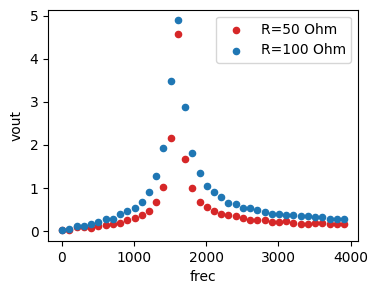

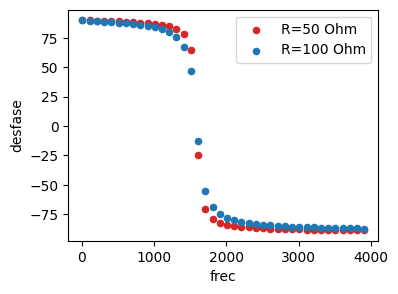

In [60]:
fig,ax = plt.subplots(figsize=(4,3))

df_R50.plot( x='frec', y="vout", ax=ax, kind='scatter', label='R=50 Ohm',color='C3' )

df_R100.plot( x='frec', y="vout", ax=ax , kind='scatter', label='R=100 Ohm')

plt.show()


fig,ax = plt.subplots(figsize=(4,3))

df_R50.plot( x='frec', y="desfase", ax=ax, kind='scatter', label='R=50 Ohm',color='C3' )

df_R100.plot( x='frec', y="desfase", ax=ax , kind='scatter', label='R=100 Ohm')

plt.show()



### Función de transferencia

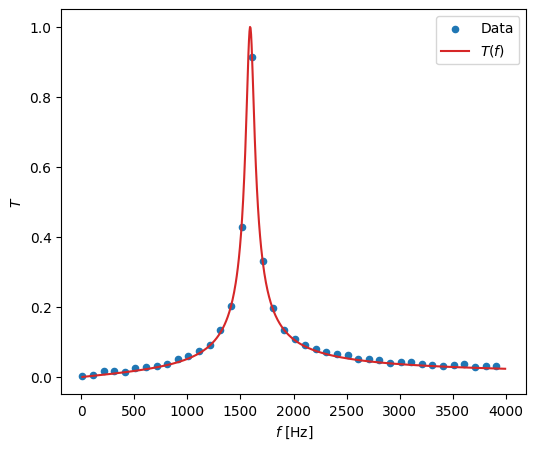

In [61]:
df_R50["T"] = df_R50["vout"]/df_R50["vin"]

R=50
L=100e-3
C=100e-9

X = lambda w: w*L - 1.0/(w*C) 

T = lambda f: 1.0/(np.sqrt( 1+ ( X(2*np.pi*f)/R )**2 ))

f = np.arange( 10,4000,5 )


fig,ax = plt.subplots( figsize=(6,5) )

df_R50.plot( x='frec', y='T', kind='scatter', ax=ax , label='Data')

ax.plot( f, T(f),c='C3' ,label='$T(f)$')

ax.set_xlabel("$f$ [Hz]")
ax.set_ylabel("$T$ ")
plt.legend()
plt.show()

### Atenuación

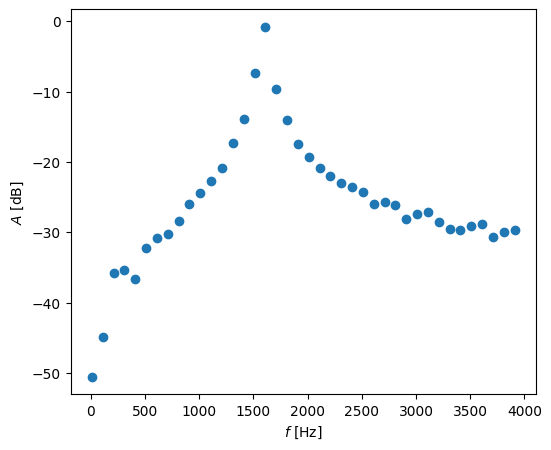

In [68]:
T = df_R50["T"].to_numpy()
A = 20*np.log10(T)
f = df_R50["frec"].to_numpy()


fig,ax = plt.subplots(figsize=(6,5))

ax.scatter( f, A,c='C0'  )

ax.set_xlabel("$f$ [Hz]")
ax.set_ylabel("$A$ [dB]")
plt.show()




### Potencia

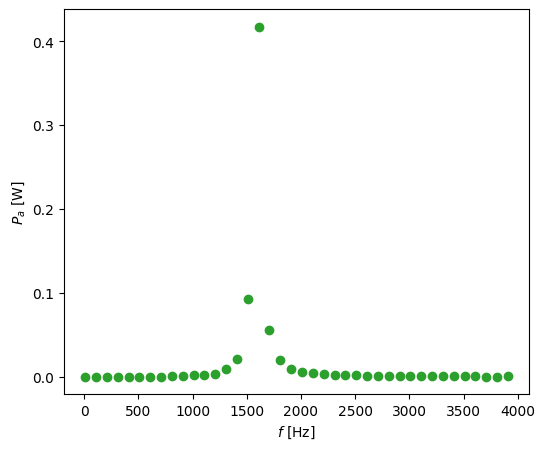

In [63]:
P = np.array( [ v*v for v in df_R50["vout"].to_numpy()] )/R

f = df_R50["frec"].to_numpy()

fig,ax = plt.subplots(figsize=(6,5))

ax.scatter( f, P,c='C2'  )

ax.set_xlabel("$f$ [Hz]")
ax.set_ylabel("$P_a$ [W]")
plt.show()


### Determinación del factor de merito

Lo hacemos con la atenuación que la curva esta mejor resuelta que l curva de potencia.

Tenemos que buscar las frecuencias cuando $A = -3 dB$

f0 = 1591.55
BWD = f2-f1 =  80.0

Factor de mérito experimental: 
Q = f0/BWD = 19.89 +- 3.00

Factor de mérito teórico: 
Q = 2pi f0 L/R =  20.0


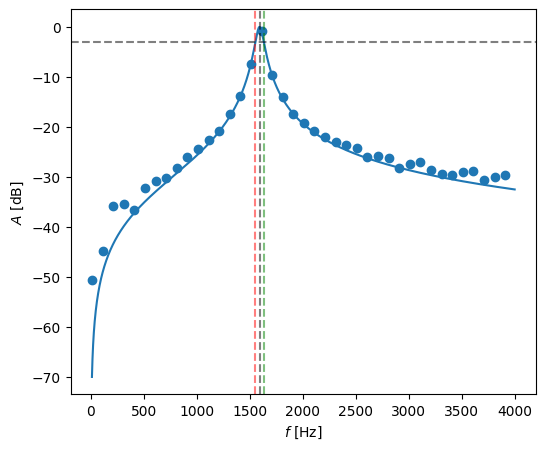

In [ ]:
# Atenuacion en datos
Td = df_R50["T"].to_numpy()
Ad = 20*np.log10(Td)
fd = df_R50["frec"].to_numpy()


# Atenuacion teorica
R=50
L=100e-3
C=100e-9
f0= (1.0/(2*np.pi))*np.sqrt( 1.0/( L*C ) )



X = lambda w: w*L - 1.0/(w*C) 
T = lambda f: 1.0/(np.sqrt( 1+ ( X(2*np.pi*f)/R )**2 ))
f = np.arange( 10,4000,1 )

A = lambda f: 20*np.log10( T(f) )


# busco f1 y f2 con metodo biseccion ======
df=100
fref=f0-df
aref = -3

f1=0
f2=0

while fref<(f0+df):

    if A(fref)<aref and A(fref+1)>aref:
        f1=fref 

    if A(fref)>aref and A(fref+1)<aref:
        f2=fref
      
    fref+=1
# =========================================

print ("f0 = %.2f"%f0)
print ("BWD = f2-f1 = ", f2-f1)

Qexp= f0/(f2-f1)

err_Qexp = 3 # Hz

print ("\nFactor de mérito experimental: ")
print ("Q = f0/BWD = %.2f +- %.2f"%(Qexp, err_Qexp) )

print ("\nFactor de mérito teórico: ")
print ("Q = 2pi f0 L/R = ", (2*np.pi*f0*L)/R)




# Plot
fig,ax = plt.subplots(figsize=(6,5))

ax.scatter( fd, Ad,c='C0'  )

ax.plot( f, A(f),c='C0'  )

ax.axhline( -3, linestyle='--', c='black',alpha=0.5 )

ax.axvline( f0, linestyle='--', c='black',alpha=0.5 )

ax.axvline( f1, linestyle='--', c='red',alpha=0.5 )

ax.axvline( f2, linestyle='--', c='green',alpha=0.5 )

ax.set_xlabel("$f$ [Hz]")
ax.set_ylabel("$A$ [dB]")
plt.show()

